In [4]:
"""
Visualize Genetic Algorithm to find a maximum point in a function.

Visit my tutorial website for more: https://mofanpy.com/tutorials/
"""
import numpy as np
import matplotlib.pyplot as plt

DNA_SIZE = 10            # DNA length
POP_SIZE = 100           # population size
CROSS_RATE = 0.8         # mating probability (DNA crossover)
MUTATION_RATE = 0.003    # mutation probability
N_GENERATIONS = 200
X_BOUND = [0, 5]         # x upper and lower bounds


def F(x): return np.sin(10*x)*x + np.cos(2*x)*x     # to find the maximum of this function


# find non-zero fitness for selection
def get_fitness(pred): return pred + 1e-3 - np.min(pred)


# convert binary DNA to decimal and normalize it to a range(0, 5)
def translateDNA(pop): return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]


def select(pop, fitness):    # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                           p=fitness/fitness.sum())
    return pop[idx]


def crossover(parent, pop):     # mating process (genes crossover)
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0, POP_SIZE, size=1)                             # select another individual from pop
        cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool)   # choose crossover points
        parent[cross_points] = pop[i_, cross_points]                            # mating and produce one child
    return parent


def mutate(child):
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child

pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))  


In [12]:
pop

array([[0, 1, 1, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [1, 0, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0, 1, 1, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
       [1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0,

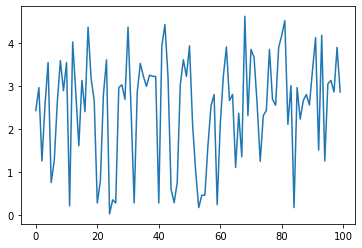

In [11]:
plt.plot(translateDNA(pop))

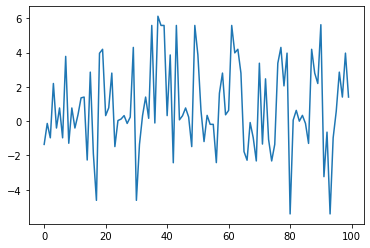

In [9]:
plt.plot(F(translateDNA(pop)))

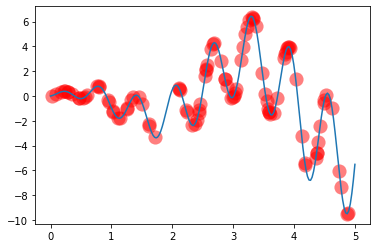

Most fitted DNA:  [1 0 1 0 1 0 0 1 1 0]


/tmp/ipykernel_189863/2268418737.py:37: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool)   # choose crossover points


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [8]:

 # initialize the pop DNA

plt.ion()       # something about plotting
x = np.linspace(*X_BOUND, 200)
plt.plot(x, F(x))

for _ in range(N_GENERATIONS):
    F_values = F(translateDNA(pop))    # compute function value by extracting DNA
    

    # something about plotting
    if 'sca' in globals(): sca.remove()
    sca = plt.scatter(translateDNA(pop), F_values, s=200, lw=0, c='red', alpha=0.5); plt.pause(0.05)

    # GA part (evolution)
    fitness = get_fitness(F_values)
    print("Most fitted DNA: ", pop[np.argmax(fitness), :])
    pop = select(pop, fitness)
    pop_copy = pop.copy()
    for parent in pop:
        child = crossover(parent, pop_copy)
        child = mutate(child)
        parent[:] = child       # parent is replaced by its child

plt.ioff(); plt.show()